# Esența transfer learning cu ajustare fina

In cazul transfer learning cu extragerea caracteristicilor, toate nivelele modelului de baza raman inghetate si se modifica dora parametrii nivelor de iesire.

In cazul transfer learning cu ajustare fina are log dezghetarea unor nivele a modelului de baza si modificare finaa a parametrilor acestora. De obicei nu se dezgheata toate nivelelee si dor un anumit numar de nivele din aproierea iesiri. Numarul de nvele dezghetate depinde de problema

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/05-transfer-learning-feature-extraction-vs-fine-tuning.png)


# Importul functiilor ajutatoare

Inainte de inceputul proiectului se conecteaza GPU

In [ ]:
# verificare conexiuni la GPU
!nvidia-smi

Mon Nov  8 07:10:27 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In sectiunile precedente au fost elaborate mai multe functii care se utilizeaza pentru a prelucra datele si a afisa rezultatele. Multe dintre aceste functii vor fi necesare si in continuare de aceea pentru a nu repeta procedura de elaborarte a acestora, toate functiine au fost plasate intr-un fisier python numit `Functii_ajutatoare.py` iar in continuare se va descarca acest modul si se vor importa functiile respective

In [ ]:
# descarcarea modulului cu functii ajutatoare
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

--2021-11-08 07:10:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-08 07:10:28 (43.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# importul functiilor ajutatoare
from helper_functions import create_tensorboard_callback

In [ ]:
# descarcarea modulului cu functii ajutatoare
!wget https://raw.githubusercontent.com/npsimid/Bazele_tensorflow/main/Functii_ajutatoare.py

--2021-11-08 07:10:31--  https://raw.githubusercontent.com/npsimid/Bazele_tensorflow/main/Functii_ajutatoare.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11829 (12K) [text/plain]
Saving to: ‘Functii_ajutatoare.py’

Functii_ajutatoare. 100%[===================>]  11.55K  --.-KB/s    in 0s      

2021-11-08 07:10:31 (62.3 MB/s) - ‘Functii_ajutatoare.py’ saved [11829/11829]



In [ ]:
# importul functiilor ajutatoare
from Functii_ajutatoare import plot_loss_curves, unzip_data, walk_through_dir

# Importul si procesarea a 10% din date

## Importul a 10% din date

In [ ]:
# importul a 10% din date
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

--2021-11-08 07:10:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.128, 172.253.119.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   165MB/s    in 1.0s    

2021-11-08 07:10:32 (165 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Dezarhivarea datelor importate
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
# vizualziarea structurii de foldere a datelor dezahivate
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
# crearea directoarelor pentru datele de training si datele de test
train_dir="10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

## Procesarea datelor

Pina acum pentru procesarea datelor (redimensionare, normarea si formarea bancurilor) se utiliza o instanta a clasei [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

O alta posibilitate ce ar permite procedura de procesare a datelor este metoda [`image_dataset_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) ce permite crearea unui obiect [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) care este mult mai rapin in cazul seturilor mari de date

In [ ]:
# Crearea datelor de intrare
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = "categorical",
                                                                            batch_size = BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                               image_size= IMG_SIZE,
                                                               label_mode = "categorical",
                                                               batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Verificare setului de date de training
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

Un alt avantaj al utilizarii obiectului `tf.data.Dataset` este faptul ca se pot accesa diferite metode si atribute, de exemplu atributul `class_names`

In [ ]:
# verificarea claselor setului de date de training
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

Pentru vizualizarea datelor unui banc se va utiliza metoda `take()`

In [ ]:
# vizualizarea datelor unui banc
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[3.57142866e-01 3.57142866e-01 3.57142866e-01]
   [3.57142866e-01 3.57142866e-01 3.57142866e-01]
   [3.57142866e-01 3.57142866e-01 3.57142866e-01]
   ...
   [8.96479721e+01 9.12907639e+01 9.30764999e+01]
   [8.84999847e+01 8.94999847e+01 9.14999847e+01]
   [8.45305176e+01 8.55305176e+01 8.75305176e+01]]

  [[1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   [1.00000000e+00 1.00000000e+00 1.00000000e+00]
   ...
   [9.52448730e+01 9.68876648e+01 1.00673401e+02]
   [9.98622589e+01 1.00862259e+02 1.04862259e+02]
   [9.48621140e+01 9.58621140e+01 9.98621140e+01]]

  [[2.14285612e-01 2.14285612e-01 2.14285612e-01]
   [2.14285612e-01 2.14285612e-01 2.14285612e-01]
   [2.14285612e-01 2.14285612e-01 2.14285612e-01]
   ...
   [9.97397156e+01 1.01382507e+02 1.05168243e+02]
   [9.23724670e+01 9.33724670e+01 9.73724670e+01]
   [9.81939545e+01 9.91939545e+01 1.03193954e+02]]

  ...

  [[2.29948864e+01 2.00000000e+01 9.07144642e+00]
   [2

# Modelul_0 - modelul baseline (10% date, fara modificare, extragere caractersitici)

Pentru crearea modelului `model_0` se va utiliza API-ul [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications) in loc de [`tf.keras.sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

Initial cu ajutorul `applications` se creaza modelul de baza iar pentru asta se specifica tipul arhitecturii, in cazul dat arhitectura EfficientNetB0.

In [ ]:
# crearea modelului de baza cu ajutorul tf.keras.aplications si excludera ultimului nivel de tip dense
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# Inghetarea tuturor nivelelor pentru modelul de baza
base_model.trainable = False

In [ ]:
# Crearea intarilor pentru modelul de baza
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = "Nivel_de_intare")

In [ ]:
# Normarea valorilor (pentru efficientNet nu este necesar doarece se include in nivelul de baza)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./225) (inputs)

In [ ]:
# aplicarea intarilor la modulul de baza
x = base_model(inputs)  # daca e vorba de intreg modului datele de intrare se trec in paranteza modulului

In [ ]:
 # Verificarea formei datelor de la iesirea modelului de baza
x.shape

TensorShape([None, 7, 7, 1280])

In [ ]:
# aplicarea unui nivel de aproximarea globala dupa valearea medie (GlobalAveragePooling)
x=tf.keras.layers.GlobalAveragePooling2D(name = "Nivelul_GlobalAveragePooling") (x)  # daca e vorba de un nivel datele de intrare se trec intr-o paranteza dupa paranteza nivelului

In [ ]:
# Verificarea formei datelor de la iesirea nivelului de pooling
x.shape

TensorShape([None, 1280])

In [ ]:
# crearea nivelului de iesire
outputs = tf.keras.layers.Dense(10, activation="softmax", name="Nivel_de_iesire") (x)

Acum ca s-au toate nivelele (modulul de baza se va confidera un nivel) se combina toate aceste cu ajutorul [`tf.keras.Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model) specificandu-se nivelul de intrare si nivelul de iesire

In [ ]:
# Combinarea tuturor acestor nivele 
model_0 = tf.keras.Model(inputs, outputs)

In [ ]:
# Compilarea modelului `model_0`
model_0.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Invatarea modelului
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5, 
                                 validation_data = test_data, 
                                 validation_steps = int(0.25*len(test_data)), 
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20211108-071046
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 45s 375ms/step - loss: 1.8999 - accuracy: 0.3667 - val_loss: 1.3460 - val_accuracy: 0.6941
Epoch 2/5
24/24 [==============================] - 7s 261ms/step - loss: 1.1596 - accuracy: 0.7413 - val_loss: 0.9421 - val_accuracy: 0.7648
Epoch 3/5
24/24 [==============================] - 7s 264ms/step - loss: 0.8455 - accuracy: 0.8027 - val_loss: 0.7520 - val_accuracy: 0.8191
Epoch 4/5
24/24 [==============================] - 7s 259ms/step - loss: 0.6920 - accuracy: 0.8333 - val_loss: 0.6707 - val_accuracy: 0.8257
Epoch 5/5
24/24 [==============================] - 7s 257ms/step - loss: 0.5941 - accuracy: 0.8653 - val_loss: 0.6010 - val_accuracy: 0.8421


In [ ]:
# Verificarea nivelelor modelului `model_0`
for i, nivel in enumerate(model_0.layers):
  print(i, nivel.name, nivel.trainable)

0 Nivel_de_intare True
1 efficientnetb0 False
2 Nivelul_GlobalAveragePooling True
3 Nivel_de_iesire True


In [ ]:
# Verificarea nivelelor modelului de baza`
for i, nivel in enumerate(model_0.layers[1].layers):
  print(i, nivel.name, nivel.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

Se observa ca pot fi modificate doar nivelele adaugate pe langa modelul de baza, dar toate nivele modelului de baza raman inghetate

In [ ]:
# verificare structurii modelului `model_0`
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Nivel_de_intare (InputLayer) [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
Nivelul_GlobalAveragePooling (None, 1280)              0         
_________________________________________________________________
Nivel_de_iesire (Dense)      (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# verificare structurii modelului de baza
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

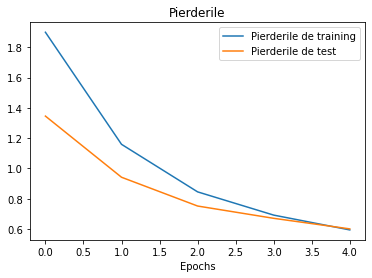

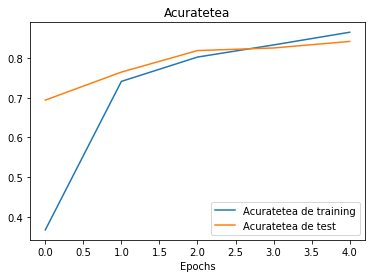

In [ ]:
# Verificarea curbei pierderilor si a acuratetei
plot_loss_curves(history_10_percent)

# Modelul_1 (1% date, cu modificate, extragere caracteristici)

## Importul datelor

In [ ]:
# Descarcarea 1% date
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2021-11-08 07:12:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 173.194.198.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   150MB/s    in 0.9s    

2021-11-08 07:12:04 (150 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# dezarhivarea datelor descarcate
unzip_data("10_food_classes_1_percent.zip")

In [ ]:
# vizualizarea structurii de fisiere
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'

In [ ]:
# crearea directoarelor pentru datele de training si datele de test
train_dir="10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

## Procesarea datelor

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           label_mode = "categorical",
                                                                           batch_size = 32,
                                                                           image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Modificarea datelor (augmentation)

In sectiunile precedante pentru modificarea datelor se utiliza parametrii instatei `ImageDataGenerator` insa incepand cu versiunea TensorFlow 2.2+ pentru modificarea datelor se poate crea un model separat utilizand [`tf.keras.layers.experimental.preprocessing`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing)

Avantajele acestui mecanism de modificare a datelor are urmatoarele avantaje:
 - Procesul de modificare are loc in GPU si nu in CPU (mult mai rapid)
 - Procesul de modificare are loc doar pentru datele de training si se ignora pentru datele de test sau de predictie

 ![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/05-data-augmentation-inside-a-model.png)

Pentru crearea modelului de modificare a datelor se va utiliza `tf.Keras.Sequential` si se vor include mai multe nivele de modificare:
* [RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip) - întoarce imaginea pe axa orizontală sau verticală.
* [RandomRotation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomRotation) - rotatia aliatoare a imagnmii in gama specificata.
* [RandomZoom](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomZoom) - marirea aliatoare a imaginii in gama specificata.
* [RandomHeight](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomHeight) - deplasarea aliatoare pe verticala a imaginii in gama specificata.
* [RandomWidth](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomWidth) - deplasarea aliatoare pe orizontala a imaginii in gama specificata.
* [Rescaling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/Rescaling) - normalizarea valorilor pixelor, nu este obligatorie pentru arhitectura `EfficientNetB0`.

In [ ]:
# importul modulelor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# Crearea modelului de modificare a datelor
data_augmentation = keras.Sequential([
                                      preprocessing.RandomFlip(),
                                      preprocessing.RandomRotation(0.2),
                                      preprocessing.RandomZoom(0.2),
                                      preprocessing.RandomHeight(0.2),
                                      preprocessing.RandomWidth(0.2),
                                      #preprocessing.Rescaling(1./255)
], name = "data_augmentation")

In continuare se va testea acest nivele prin aplicarea la intarea sa a unei imagini aliataore si vizualizarea rezultatului modificarii

In [ ]:
# importul modulelor necesare
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

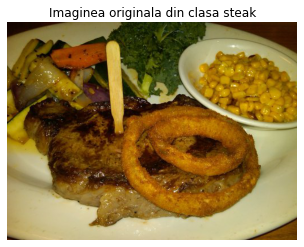

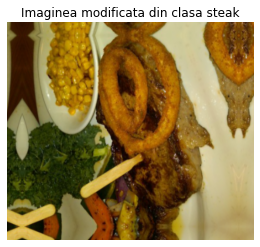

In [ ]:
# selectarea unui clase aliatoare
target_class = random.choice(train_data_1_percent.class_names)

# crearea directoriului catre clasa selectata
targer_dir = train_dir + target_class

#selectarea unei imagini aliatoare din classa selectata
random_image = random.choice(os.listdir(targer_dir))

# crearea directoriului catre imaginea selectata
random_image_path = targer_dir + "/" + random_image

# citirea imagnii selectate
img = mpimg.imread(random_image_path)

# afisarea imaginii originale
plt.imshow(img)

# Setarea titlului imaginii originale
plt.title(f"Imaginea originala din clasa {target_class}")

# excluderea axelor
plt.axis(False)

# adaugarea unui dimensiuni a pentru imagninea selectata
img_dim = tf.expand_dims(img, axis=0)

# modificarea imaginii prin trecerea acesteia la nmodelul de modificare 
augmented_img = data_augmentation(img_dim)

# normalizarea imagnii si inalturarea dimensiunii suplimentarea
img_augment = tf.squeeze(augmented_img)/255.

# afisarea imaginii modificate
plt.figure()
plt.imshow(img_augment)

# setarea titlului imaginii modificate
plt.title(f"Imaginea modificata din clasa {target_class}")

# excluderea axelor
plt.axis(False);

## Elaborarea Model_1

In continuare se va crea modelul_1 folosind Functional API ce va include
- Nivelul de intarea
- Nivelul modelului de modificare a datelor
- Nivelul modelului de baza cu extargerea caracteristicilor (EfficientNetB0)
- Nivelul global_average_pooling
- Nivelul de iesire

In [ ]:
# Crearea nivelului de intrarea
inputs = layers.Input(shape=(224, 224, 3), name="Nivel_de_intrare")

In [ ]:
# Aplicarea datelor nivelului de intrare la nivelul modelului de modificare
x=data_augmentation(inputs)

In [ ]:
# Apelarea modelului de baza cu excluderea nivelului dense de la iesire
base_model = keras.applications.EfficientNetB0(include_top=False)

In [ ]:
# Inghetarea tuturor parametrilor modelului de baza
base_model.trainable = False

In [ ]:
# aplicarea datelor de la nivelul modelului de modificare la nivelul modelului de baza fara invatarea lor
x=base_model(x, training = False) 

In [ ]:
# Aplicarea datelor de lanivelul mdelului de baza la nivelul global-average_pooling
x= layers.GlobalAveragePooling2D(name = "Nivelul_Global_Average_pooling")(x)

In [ ]:
#Crearea nivelului de iesire si aplicarea datelor de la nivelul 
outputs = layers.Dense(10, activation="softmax", name="Nivel_de_iesire")(x)

In [ ]:
# crearea modelului model_1
model_1 = keras.Model(inputs, outputs)

In [ ]:
# compilarea modelului
model_1.compile(optimizer= tf.keras.optimizers.Adam(),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

In [ ]:
# invatarea modelului
history_1_percent = model_1.fit(train_data_1_percent, 
                                epochs = 10,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25*len(test_data)),
                                callbacks = [create_tensorboard_callback("transfer_learning",
                                                                        "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20211108-071210
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 16s 4s/step - loss: 2.3692 - accuracy: 0.1000 - val_loss: 2.2213 - val_accuracy: 0.1628
Epoch 2/10
3/3 [==============================] - 7s 3s/step - loss: 2.1564 - accuracy: 0.2143 - val_loss: 2.1206 - val_accuracy: 0.2138
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 1.9435 - accuracy: 0.2857 - val_loss: 2.0135 - val_accuracy: 0.2944
Epoch 4/10
3/3 [==============================] - 4s 2s/step - loss: 1.8012 - accuracy: 0.4000 - val_loss: 1.9227 - val_accuracy: 0.3635
Epoch 5/10
3/3 [==============================] - 4s 2s/step - loss: 1.6392 - accuracy: 0.5714 - val_loss: 1.8378 - val_accuracy: 0.4161
Epoch 6/10
3/3 [==============================] - 6s 3s/step - loss: 1.5331 - accuracy: 0.7143 - val_loss: 1.7651 - val_accuracy: 0.4507
Epoch 7/10
3/3 [==============================] - 6s 3s/step - loss: 1.3485 - accuracy: 0.8143 - val_loss: 1.7148 - val_accuracy: 0.4770
Epoch 8/10
3/3 [==============================] - 5

## Evaluarea modelului

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Nivel_de_intrare (InputLayer [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
Nivelul_Global_Average_pooli (None, 1280)              0         
_________________________________________________________________
Nivel_de_iesire (Dense)      (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
#Evaluarea modelului pe intreg setul de test
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 11s 133ms/step - loss: 1.5508 - accuracy: 0.5432


[1.550804615020752, 0.5432000160217285]

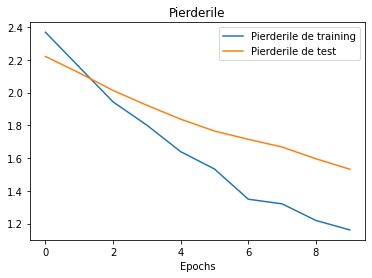

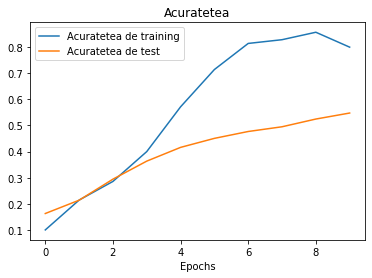

In [ ]:
# Afisarea curbei peirderilor si a acuratetei
plot_loss_curves(history_1_percent)

# Modelul_2 (10% date, cu modificare, extragere caracteristici)

## Crearea callback-ului ModelCheckpoint

Callback-ul [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) este o alta functionalitate ce poate fi aplicata modelului in timpul procesului de training care permite salvarea modelului, fie intregul model in format [`SavedModel`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model), fie doar a [ponderilor (weights)](https://www.tensorflow.org/tutorials/keras/save_and_load#manually_save_weights) intr-un fisier specificat.

Acest lucru este util atunci cand procesul de training are loc mult timp si astfel se poate forma niste puncte intermediare de salvare ca mai apoi la necesitate sa se reincarce procesul de training pornind din aceste puncte

In [ ]:
# Crearea directoriului de salvarea a punctelor intermediare (check points)
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

In [ ]:
# Crearea callback-ului ModelCheckpoint de salvare doar a ponderilor modelului
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor = 'val_loss', # valoarea care va fi monitorizata
                                                         save_best_only=False, # daca e True se salveaza doar cazul in care valoarea monitorizata este cea mai buna
                                                         save_weights_only=True, # True permite salvarea doar a ponderilor, False permite salvarea intregului model
                                                         save_freq='epoch', # se salveaza la fiecare epoch nu este setata save-best_only
                                                         verbose=1)

## Crearea modelului model_2

In [ ]:
# Descarcarea si dezarhivarea datelor (nu este necesar in cazul dat deoarece datele a u fost descarcate si salvate deja)

# Crearea directoriului catre datele de training si datele de test
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

# precesarea datelor de training
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          label_mode = "categorical",
                                                                          image_size = (224, 224) )

# precesarea datelor de test
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (224, 224) )

# Crearea modelului de modificare a datelor
data_augmentation=tf.keras.Sequential([
                                       preprocessing.RandomFlip(),
                                       preprocessing.RandomHeight(0.2),
                                       preprocessing.RandomWidth(0.2),
                                       preprocessing.RandomZoom(0.2),
                                       preprocessing.RandomRotation(0.2)
], name = "data_augmentation")

# crearea nivelului de intrare
inputs=tf.keras.layers.Input(shape=(224, 224,3),
                             name="Nivel_de_intrare")

#Aplicarea datelor de la nivelul de intrare la nivelul modelului de modificare
x=data_augmentation(inputs)

# crearea modelului de baza
base_model = keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#aplicarea datelor modifical al nivelul de baza
x=base_model(x, training=False)

#aplicarea datelor de la modelul de baza la nicelul de medire globala
x=tf.keras.layers.GlobalAveragePooling2D(name="nivel-de_mediere_globala") (x)

# crearea nivelului de iesire
outputs = layers.Dense(10, activation="softmax", name="Nivel_de_iesire") (x)

# creara modelului model_2
model_2=tf.keras.Model(inputs, outputs)

#Compilarea modelului model_2
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics= ["accuracy"])

# Fixarea numarului de epoch
initial_epoch=5

#Invatarea modelului
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs =initial_epoch,
                                          steps_per_epoch=len(train_data_10_percent),
                                          validation_data=test_data,
                                          validation_steps=int(0.25*len(test_data)),
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20211108-071336
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 26s 781ms/step - loss: 2.0530 - accuracy: 0.2920 - val_loss: 1.5897 - val_accuracy: 0.5822

Epoch 00001: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 14s 561ms/step - loss: 1.4452 - accuracy: 0.6400 - val_loss: 1.1386 - val_accuracy: 0.7368

Epoch 00002: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 15s 623ms/step - loss: 1.1472 - accuracy: 0.7213 - val_loss: 0.9179 - val_accuracy: 0.7780

Epoch 00003: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 13s 535ms/step - loss: 0.9801 - accuracy: 0.7440 - val_loss: 0.8041 - val_accuracy: 0.7977

Epoch 00004: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 14s 560ms/step - loss: 0.8846 - accuracy: 0.7667 - val_

## Evaluarea modelului model_2

In [ ]:
# evaluara modelului pe integ setul de test
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 11s 129ms/step - loss: 0.7400 - accuracy: 0.8048


[0.7399870157241821, 0.8047999739646912]

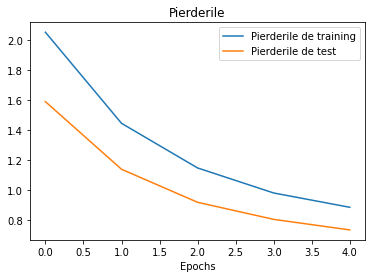

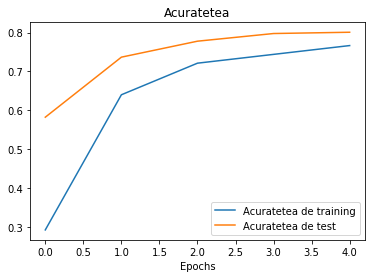

In [ ]:
# vizualizarea curbei pierderilor si a acuratetei
plot_loss_curves(history_10_percent_data_aug)

Intrucat ponderile modelelor au fost salvate prin callback-ul ModelCheckpoint acestea pot fi incarcate si se poate verifica daca modelul ce va incarca aceste ponderi va fi identic uc modelul din care s-au salvat ponderile

Pentru incarcarea ponderilor in cadrul unui modele se va utiliza metoda [`load_weights()`](https://www.tensorflow.org/tutorials/keras/save_and_load#checkpoint_callback_options)

In [1]:
# incarcare ponderilor
model_2.load_weights(checkpoint_path)

NameError: ignored

In [ ]:
# evaluarea modelului cu noile ponderi
loaded_weghts_model_result = model_2.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.7400 - accuracy: 0.8048


In [ ]:
# verificarea daca reziultatele sunt aceleasi
results_10_percent_data_aug==loaded_weghts_model_result 

False

In [ ]:
#Verificarea daca rezultatele sunt apropiate
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weghts_model_result))

array([ True,  True])

In [ ]:
# Verificarea diferentei dintre rezultate
diff = np.array(results_10_percent_data_aug)-np.array(loaded_weghts_model_result)
list(diff)

[1.7881393432617188e-07, 0.0]

# Modelul_2 (10% date, cu modificare, ajustarea fina)

## Dezghetarea nivelelor

In modelele elaborate mai sus, modelul de baza a avut toate nivelele inchetate deci acestea nu si-au modificat parametri in procesul de training pe datele problemei curente.

Pentru a se imbunatati performantele modelului se poate recurge la procedura de ajustare fina. Acesta procedura presupune dezghetarea unor nivele din modelul de baza si ajustarea fina a acestora in procesul de training.

De obicei, procesul de ajustare finaa se aplica ca o continuare in trainigul datelor dupa ce a fost realizata extargerea caracteristicilor [Keras' guide on Transfer learning & fine-tuning](https://keras.io/guides/transfer_learning/).

In continuare se va aplica ajustarea finaa asupra model_2, adica asupra unui model in care s-a realizat extragerea caracteristicilor si a carui ponteri su fost salvate

In [ ]:
# verificarea nivelelor in modelul cu ponderile descarcate
model_2.layers

In [ ]:
# verificarea nivelor cu parametri ce pot fi modificati
for layer in model_2.layers:
  print(layer.trainable)

True
True
False
True
True


In [ ]:
# verificarea structurii modelului model_2
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Nivel_de_intrare (InputLayer [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
nivel-de_mediere_globala (Gl (None, 1280)              0         
_________________________________________________________________
Nivel_de_iesire (Dense)      (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# verificarea numarului nivelelor trainable ale modelului model_2
len(model_2.trainable_variables)

2

In [ ]:
# verificarea numarului de nivele trainable in modelul de baza care reprezinta si nivelul cu indicile 2 in model_2
len(model_2.layers[2].trainable_variables)

0

In [ ]:
# Vizualizarea tuturor nivelelor modelului de baza si caracteristica de training a acestora
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In continuare se vor dezgheta ultimile 10 nivele din modelul de baza. Pentru aceasta se vor dezgheta toate nivele esi apoi s evor ingheta inapoi toate cu exceptia ultimelor 10 nivele

In [ ]:
# se dezgheata toate nivelele
base_model.trainable=True

# Se eingheata tot cu exceptia ultimelor 10  nivele
for layer in base_model.layers[:-10]:
  layer.trainable=False

In [ ]:
# Vizualizarea tuturor nivelelor modelului de baza si caracteristica de training a acestora dupa dezghetare
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# verificarea numarului nivelelor trainable ale modelului model_2
len(base_model.trainable_variables)

10

## Reconfigurarea modelului model_2

Dupa dezghetarea nivelelor in modelul de baza, modelul model_2 trebuie recompilat cu parametrul learning_rate mai mic decat era anterior (relgalrea trebuie sa fine mai fina) 

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
# # verificarea numarului nivelelor trainable ale modelului model_2
len(model_2.trainable_variables)

12

Reinvatarea modelului model_2 dar de aceasta date se va incepe invatarea de la ultimul epochs de la etapa de extragere a caracteristicilor 

In [ ]:
# setarea numarului de epoch
fine_tune_epochs=initial_epoch+5

In [ ]:
# fixarea primei epoch drept ultima epoch de la extargerea caracteristicilor
initial_epoch=history_10_percent_data_aug.epoch[-1]

In [ ]:
# reinvatarea modelului model_2
history_fine_10_percent_data_aug = model_2.fit(x=train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data = test_data,
                                               steps_per_epoch=len(train_data_10_percent),
                                               initial_epoch=initial_epoch,
                                               validation_steps=int(0.25*len(test_data)),
                                               callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20211108-071541
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 25s 660ms/step - loss: 0.7335 - accuracy: 0.7867 - val_loss: 0.6464 - val_accuracy: 0.7829
Epoch 6/10
24/24 [==============================] - 12s 501ms/step - loss: 0.6514 - accuracy: 0.7907 - val_loss: 0.5821 - val_accuracy: 0.7993
Epoch 7/10
24/24 [==============================] - 14s 587ms/step - loss: 0.5472 - accuracy: 0.8253 - val_loss: 0.5520 - val_accuracy: 0.8109
Epoch 8/10
24/24 [==============================] - 14s 593ms/step - loss: 0.5299 - accuracy: 0.8373 - val_loss: 0.5890 - val_accuracy: 0.8076
Epoch 9/10
24/24 [==============================] - 12s 514ms/step - loss: 0.4564 - accuracy: 0.8467 - val_loss: 0.5409 - val_accuracy: 0.8339
Epoch 10/10
24/24 [==============================] - 14s 579ms/step - loss: 0.4204 - accuracy: 0.8827 - val_loss: 0.5312 - val_accuracy: 0.8224


## Evaluarea noului model model_2

In [ ]:
# Evaluarea modelului pe intregul set a datelor de test
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 11s 129ms/step - loss: 0.5283 - accuracy: 0.8228


Pentru compararea acuratetei si a functiei pierderilor modelelor pana la ajustarea fina si dupa ajustarea fina se va crea o functie

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compareara functiei pierderilor si a acuratetei a doua modele unul pina la ajustarea fina si altul dupa ajustarea fina.
    """
    #  acuratetea si fuctia pierderilor pina la ajustarea fina
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

   #  combinarea acuratetei si a fuctia pierderilor de pina si dupa ajustarea fina
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))

    # Afisarea graficului
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Acuratetea de training')
    plt.plot(total_val_acc, label='Acuratetea de test')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Inceputul ajustarii fine') 
    plt.legend(loc='lower right')
    plt.title('Acuratetea de training si de test')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Functia pierderilor de training')
    plt.plot(total_val_loss, label='Functia pierderilor de test')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Inceputul ajustarii fine')
    plt.legend(loc='upper right')
    plt.title('Functia pierderilor de training si de test')
    plt.xlabel('epoch')
    plt.show()

5
11


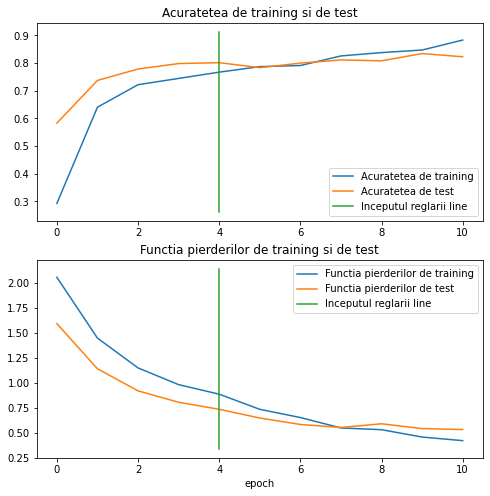

In [ ]:
# compararea functiei pierderilor si a acuratetei 
compare_historys(history_10_percent_data_aug, history_fine_10_percent_data_aug)

# Modelul_2 (100% date, cu modificare, ajustare fina)

In continuare se va analiza cum lucreaza ajustare fina in cazul setului intreg de date 

In [ ]:
# Descarcarea intergului set de date
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-11-08 07:17:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 64.233.182.128, 64.233.183.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   183MB/s    in 2.7s    

2021-11-08 07:17:38 (183 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Dezarhivarea datelor descarcate
unzip_data("10_food_classes_all_data.zip")

In [ ]:
# vizualziarea structurii de fisiere pentru datele dezarhivate
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [ ]:
# setarea directoarelor datelor de training si de test
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# crearea seturlui de date tenssor din imaginile de pe directoarele de trainingsi de test
import tensorflow as tf
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size = (224, 224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (224, 224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Incarcarea ponderilor modelului model_2
model_2.load_weights(checkpoint_path)

In [ ]:
# verificarea nivelelor trainalbe in model_2
for i, layer in enumerate(model_2.layers):
  print(i, layer.name, layer.trainable)

0 Nivel_de_intrare True
1 data_augmentation True
2 efficientnetb0 True
3 nivel-de_mediere_globala True
4 Nivel_de_iesire True


In [ ]:
# verificarea nivelelor trainable in modelul de baza
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
#Compilarea modelului 
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics = ["accuracy"])

In [ ]:
# invatarea modelului pe intregul set de date
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs = 10,
                                           initial_epoch = history_10_percent_data_aug.epoch[-1],
                                           validation_data = test_data,
                                           validation_steps = int(0.25*len(test_data)),
                                           callbacks = [create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20211108-073358
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 69s 264ms/step - loss: 0.8047 - accuracy: 0.7432 - val_loss: 0.4148 - val_accuracy: 0.8651
Epoch 6/10
235/235 [==============================] - 80s 336ms/step - loss: 0.6418 - accuracy: 0.7944 - val_loss: 0.3706 - val_accuracy: 0.8717
Epoch 7/10
235/235 [==============================] - 72s 305ms/step - loss: 0.5874 - accuracy: 0.8081 - val_loss: 0.3608 - val_accuracy: 0.8816
Epoch 8/10
235/235 [==============================] - 66s 278ms/step - loss: 0.5440 - accuracy: 0.8273 - val_loss: 0.3653 - val_accuracy: 0.8783
Epoch 9/10
235/235 [==============================] - 67s 282ms/step - loss: 0.4877 - accuracy: 0.8408 - val_loss: 0.3409 - val_accuracy: 0.8882
Epoch 10/10
235/235 [==============================] - 61s 256ms/step - loss: 0.4755 - accuracy: 0.8513 - val_loss: 0.3393 - val_accuracy: 0.8947


In [ ]:
# evaluarea modelului pe intregul set de date de test
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 11s 130ms/step - loss: 0.3378 - accuracy: 0.8964


[0.33777523040771484, 0.896399974822998]

5
11


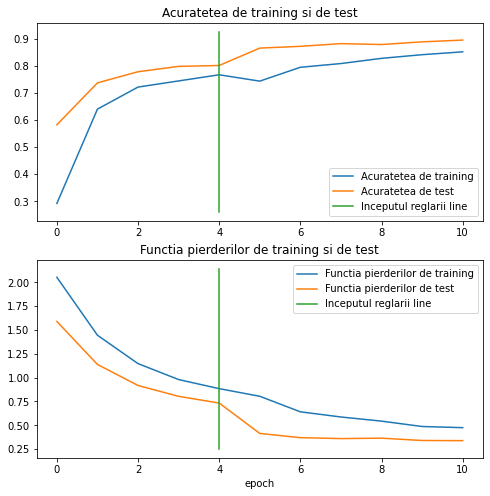

In [ ]:
# compararea functiei pierderilor si a acuratetei 
compare_historys(history_10_percent_data_aug, history_fine_10_classes_full)

# Vizualizarea rezultatelor cu TensorBoard

Intrucat rezultatele tutror modelelor a u fost salvate cu ajutorul TensirBaord callback, acestea for fi vizualziate cu ajutorul acestui instrument

In [ ]:
# incarcarea inregistrarilor in TensorBoard
!tensorboard dev upload \
--logdir ./transfer_learning \
--name "Experimente Transfer Learning" \
--description "O serie de diferite experimente transfer learning cu diferite cantitati de date si cu ajustare fina" \
--one_shot

2021-11-08 07:45:31.730323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 07:45:31.746466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 07:45:31.747034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Priv

In [ ]:
# vizualziarea tuturor experimentelor
!tensorboard dev list

2021-11-08 07:48:00.636222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 07:48:00.644710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 07:48:00.645302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/JwogL581QK25W7cLJkcbhg/
	Name                 Experimente Transfer Learning
	Description          O serie de diferite experimente transfer learning cu diferite cantitati de date si cu reglare fina
	Id                   JwogL581QK25W7cLJkcbhg
	Created              2021-11-08 07:46:23 (1 minute ago)
	Updat

# 🛠 Exercises

1. Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.
2. Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using [`tf.keras.applications.EfficientNetB0`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0) as the base model. Use the [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback to save the weights to file.
3. Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?
4. Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

# 📖 Extra-curriculum

* Read the [documentation on data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) in TensorFlow.
* Read the [ULMFit paper](https://arxiv.org/abs/1801.06146) (technical) for an introduction to the concept of freezing and unfreezing different layers.
* Read up on learning rate scheduling (there's a [TensorFlow callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler) for this), how could this influence our model training?
  * If you're training for longer, you probably want to reduce the learning rate as you go... the closer you get to the bottom of the hill, the smaller steps you want to take. Imagine it like finding a coin at the bottom of your couch. In the beginning your arm movements are going to be large and the closer you get, the smaller your movements become.